# LDA Example

The main package for machine learning in Python is **scikit-learn**.

Further reading:
- [scikit-learn](https://scikit-learn.org) (Machine Learning libraries)

In addition, we will be using the following libraries:
- Data management
    - [numpy](https://numpy.org/) (linear algebra)
    - [pandas](https://pandas.pydata.org/) (data processing, CSV file)

- Plotting
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)

In [1]:
# Import necessary modules
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             roc_auc_score, roc_curve, confusion_matrix, 
                             ConfusionMatrixDisplay, classification_report,RocCurveDisplay
                            )
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from feature_engine.selection import DropCorrelatedFeatures
from sklearn.preprocessing import LabelBinarizer


import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Interactive plotting
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’

### 1. Our data

#### Iris data


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
df = pd.read_csv(url, names=cls)

In [3]:
dict_target = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica":2}
df.replace({'Class': dict_target}, inplace = True)

In [4]:
df.head(5)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 2. Split data intro train/test

#### Define feature and target matrix

In [5]:
features = list(df.columns)
target = 'Class'
features.remove(target)

In [6]:
X = df[features]
y = df[target]

#### Split
Based on [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) create X_train,X_test,y_train and y_test where:
- test_size = 0.2 (percentage of test data)
- random_state = 0 (seed for replication)
- stratify = target name (Preserves distribution of y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  
                                                    random_state=0, 
                                                    stratify = y)   

### 3. Training Machine Learning Models 

[LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

In [8]:
# Preprocessing:
numeric_features = features
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler()),
           ("remove_correlated",DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.8))]
        )

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
    ]
)

# Union preprocessing + classifier
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LinearDiscriminantAnalysis(n_components = 2))]
)

# search hyperparams
param_grid = {
    "classifier__solver": ["svd","lsqr", "eigen"]
}

# GridSearchCV
search = GridSearchCV(clf, 
                      param_grid, 
                      n_jobs=1, 
                      verbose=4,
                      cv = 3,
                      return_train_score=True)

In [9]:
# training
search.fit(X_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END classifier__solver=svd;, score=(train=0.800, test=0.875) total time=   1.9s
[CV 2/3] END classifier__solver=svd;, score=(train=0.838, test=0.825) total time=   0.0s
[CV 3/3] END classifier__solver=svd;, score=(train=0.850, test=0.800) total time=   0.0s
[CV 1/3] END classifier__solver=lsqr;, score=(train=0.800, test=0.875) total time=   0.0s
[CV 2/3] END classifier__solver=lsqr;, score=(train=0.838, test=0.825) total time=   0.0s
[CV 3/3] END classifier__solver=lsqr;, score=(train=0.850, test=0.800) total time=   0.0s
[CV 1/3] END classifier__solver=eigen;, score=(train=0.800, test=0.875) total time=   0.0s
[CV 2/3] END classifier__solver=eigen;, score=(train=0.838, test=0.825) total time=   0.0s
[CV 3/3] END classifier__solver=eigen;, score=(train=0.850, test=0.800) total time=   0.0s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('remove_correlated',
                                                                                          DropCorrelatedFeatures())]),
                                                                         ['sepal-length',
                                                                          'sepal-width',
                                                                          'petal-length',
                                                                          'petal-width'])])),
                                       ('classifier',
                                        LinearDiscriminantAnalysis(n_components=2))]),
             n_jobs=1,
             param_grid={'classifier__solver': ['svd', 'lsqr', 'eigen']},
             return_train_score=True, verbose=4)

In [10]:
# note: score function --> Return the mean accuracy on the given data and labels.
print("model score: %.3f" % np.round(search.score(X_test, y_test),1))

model score: 0.700


#### GridSearchCV parameters

In [11]:
# best model
best_model = search.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('remove_correlated',
                                                                   DropCorrelatedFeatures())]),
                                                  ['sepal-length',
                                                   'sepal-width',
                                                   'petal-length',
                                                   'petal-width'])])),
                ('classifier', LinearDiscriminantAnalysis(n_components=2))])

In [12]:
# best params
best_params = search.best_params_
best_params

{'classifier__solver': 'svd'}

In [13]:
# cross validation results
cv_results = pd.DataFrame(search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.637034,0.890541,0.003525,0.000578,svd,{'classifier__solver': 'svd'},0.875,0.825,0.8,0.833333,0.03118,1,0.8,0.8375,0.85,0.829167,0.021246
1,0.005763,0.000264,0.002807,0.000144,lsqr,{'classifier__solver': 'lsqr'},0.875,0.825,0.8,0.833333,0.03118,1,0.8,0.8375,0.85,0.829167,0.021246
2,0.006269,0.000890,0.002650,0.000125,eigen,{'classifier__solver': 'eigen'},0.875,0.825,0.8,0.833333,0.03118,1,0.8,0.8375,0.85,0.829167,0.021246


In [14]:
# plot

# -- get right form data
n_cv = search.cv
train_score = []
validation_score = []
rank = []

for i in cv_results["rank_test_score"].unique():
    model_data = cv_results[cv_results["rank_test_score"]==i]
    
    columns_to_filter_train = ["split"+str(j)+"_train_score" for j in range(0,n_cv)]
    columns_to_filter_validation = ["split"+str(j)+"_test_score" for j in range(0,n_cv)]
    
    train_score = train_score + list(model_data[columns_to_filter_train].values[0])
    validation_score = validation_score + list(model_data[columns_to_filter_validation].values[0])
    
    rank = rank + n_cv*["model_rank_"+str(i)]
    
to_plot = pd.DataFrame()
to_plot["train_score"] = train_score
to_plot["validation_score"] = validation_score
to_plot["model_rank"] = rank

to_plot.head(10)

,train_score,validation_score,model_rank
0,0.8000,0.875,model_rank_1
1,0.8375,0.825,model_rank_1
2,0.8500,0.800,model_rank_1


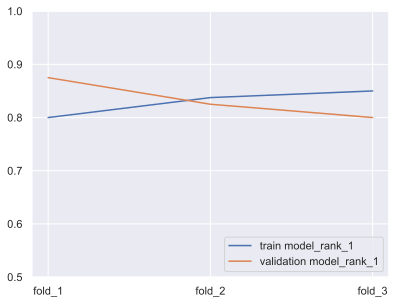

In [15]:
n_folds = ["fold_"+str(i) for i in range(1,n_cv+1)]
y1 = to_plot[to_plot["model_rank"]=="model_rank_1"]["train_score"]
y2 = to_plot[to_plot["model_rank"]=="model_rank_1"]["validation_score"]
plt.plot(n_folds,y1, label = "train model_rank_1")
plt.plot(n_folds,y2, label = "validation model_rank_1")

plt.ylim([0.5, 1])
plt.legend(loc="lower right")

#### Predictions

In [16]:
# prediction classes
y_pred = search.predict(X_test)

# prediction probabilities
y_pred_proba = search.predict_proba(X_test)

In [17]:
y_pred[0:5]

array([0, 1, 0, 1, 0])

In [18]:
y_pred_proba[0:5]

array([[9.82970228e-01, 1.58615448e-02, 1.16822729e-03],
       [8.09353966e-03, 8.41738911e-01, 1.50167549e-01],
       [9.99958767e-01, 4.04376127e-05, 7.95591830e-07],
       [4.19697204e-05, 6.09317177e-01, 3.90640854e-01],
       [9.97245232e-01, 2.69239286e-03, 6.23748150e-05]])

#### Performance metrics

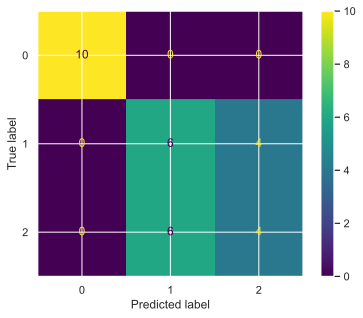

In [19]:
cm = confusion_matrix(y_test, y_pred, labels=search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=search.classes_)
disp.plot()

plt.show()

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.50      0.60      0.55        10
           2       0.50      0.40      0.44        10

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.66        30
weighted avg       0.67      0.67      0.66        30



In [21]:
# roc curve multiclasses
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

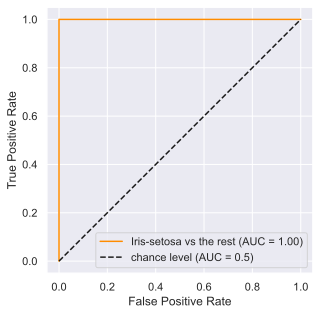

In [22]:
class_id = 0

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_pred_proba[:, class_id],
    name="Iris-setosa vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

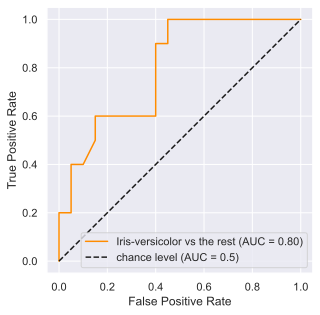

In [23]:
class_id = 1

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_pred_proba[:, class_id],
    name="Iris-versicolor vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

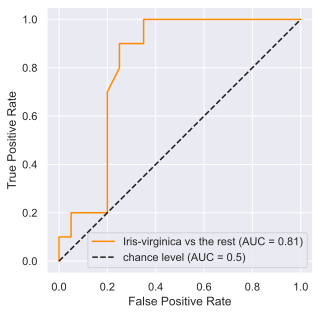

In [24]:
class_id = 2

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_pred_proba[:, class_id],
    name="Iris-virginica vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

#### Understanding LDA

Text(0.5, 1.0, 'Components')

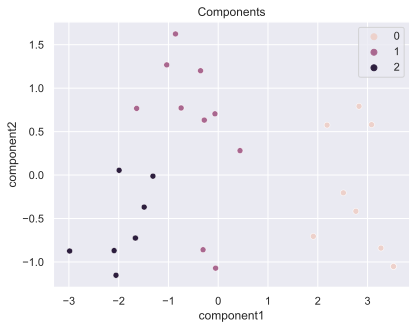

In [25]:
to_plot_lda = pd.DataFrame(search.transform(X_test), columns =["component1","component2"])
to_plot_lda["y_pred"] = list(y_pred)

# separate classes by components
sns.scatterplot(x = 'component1', y = 'component2', hue = y_pred, data = to_plot_lda).set_title("Components")

In [26]:
to_plot_lda.head(5)

,component1,component2,y_pred
0,1.910154,-0.705137,0
1,-0.279755,0.632348,1
2,3.521069,-1.051468,0
3,-1.638951,0.766984,1
4,2.514195,-0.204690,0


On summary:

LDA has some very strong assumptions of normal distributions. It acts as dimensionality reduction, therefore, if we have many variables it is difficult to interpret.